In [5]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import tensorflow as tf
tf.config.experimental.list_physical_devices()
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,Dense ,Dropout, Flatten
from tensorflow.keras.layers import Input
#import matplotlib.pyplot as plt

In [6]:
import matplotlib.pyplot as plt

In [7]:
total_images=0
dir=os.listdir("Images/")
for d in dir:
    files=list(os.listdir("Images/"+d))
    print(d+" Folder Has "+str(len(files))+"images")
    total_images=total_images+len(files)
#print("Total Images : " ,total_images)
print("Total Images :" ,total_images)


daisy Folder Has 765images
dandelion Folder Has 1052images
rose Folder Has 784images
sunflower Folder Has 733images
tulip Folder Has 984images
Total Images : 4318


In [8]:
base_dir="Images/"
training_dataset=tf.keras.utils.image_dataset_from_directory( base_dir,
                                                           image_size=(180,180),
                                                           seed=123,
                                                           validation_split=0.2,
                                                           subset='training',
                                                            batch_size=32)

Found 4321 files belonging to 5 classes.
Using 3457 files for training.


In [9]:
validation_dataset=tf.keras.utils.image_dataset_from_directory( base_dir,
                                                           image_size=(180,180),
                                                           seed=123,
                                                           validation_split=0.2,
                                                           subset='validation',
                                                              batch_size=32)

Found 4321 files belonging to 5 classes.
Using 864 files for validation.


In [10]:
flower_names=training_dataset.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

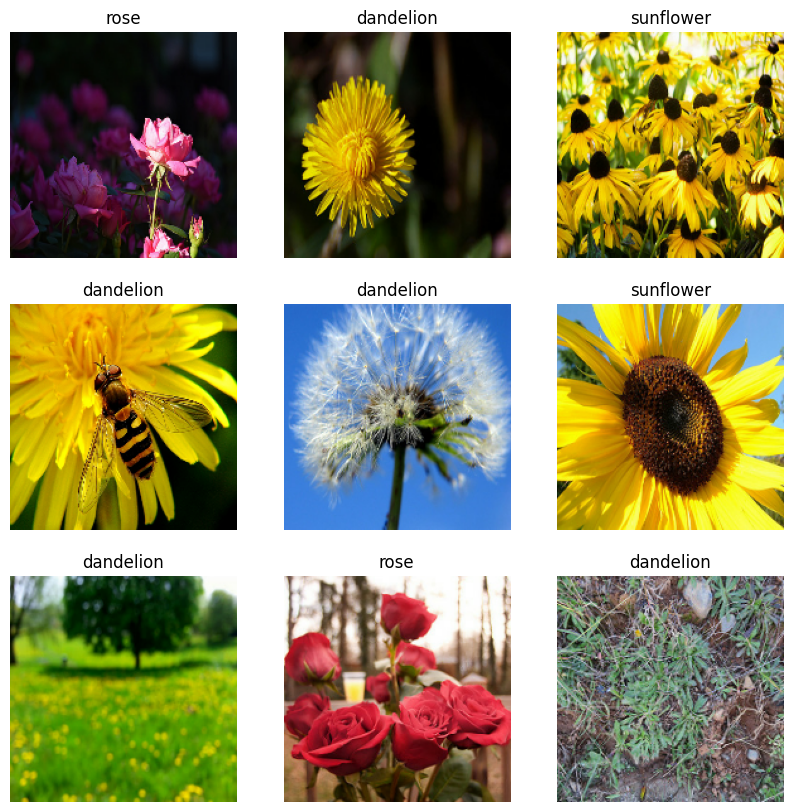

In [11]:
plt.figure(figsize=(10,10))

for images , labels in training_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis("off")

In [12]:
AUTOTUNE =tf.data.AUTOTUNE

In [13]:
training_dataset=training_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [14]:
validation_dataset=validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
data_augmentation=Sequential([
    Input(shape=(180,180,3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)    
])

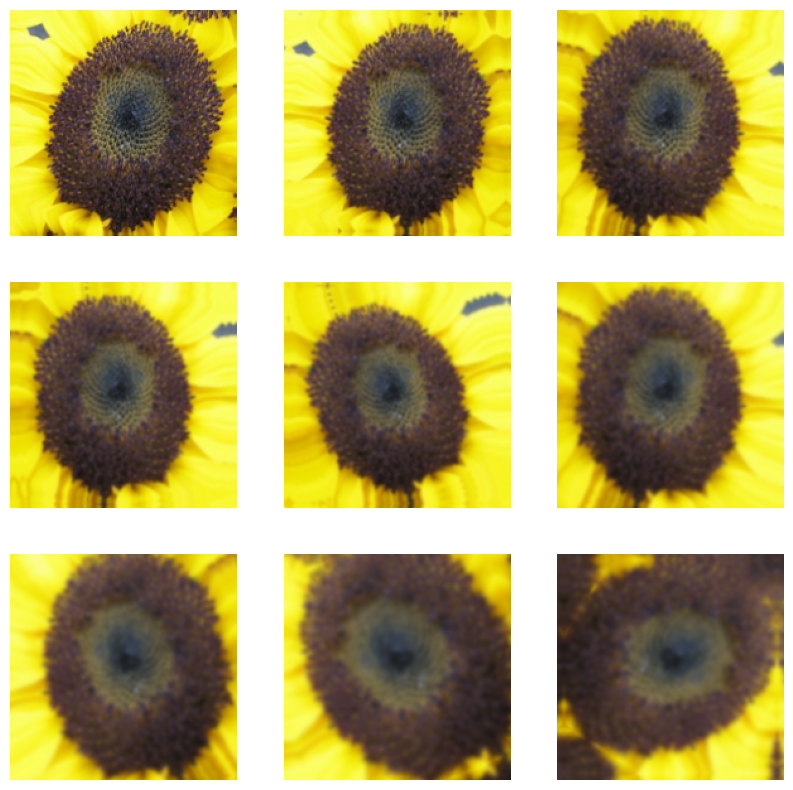

In [16]:
i=0
plt.figure(figsize=(10,10))

for images , labels in training_dataset.take(1):
    for i in range(9):
        images=data_augmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis("off")

In [17]:
model=Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16,3,padding='same', activation='relu'),
    MaxPooling2D(),
    
    Conv2D(32,3,padding='same', activation='relu'),
    MaxPooling2D(),
    
    Conv2D(64,3,padding='same', activation='relu'),
    MaxPooling2D(),
    
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(6)
    
])
model.build(input_shape=(None, 180, 180, 3))

In [18]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,414 (15.22 MB)

 Trainable params: 3,989,414 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history =model.fit(training_dataset,epochs=23,validation_data=validation_dataset)

Epoch 1/23
109/109 ━━━━━━━━━━━━━━━━━━━━ 64s 585ms/step - accuracy: 0.8202 - loss: 0.4737 - val_accuracy: 0.7512 - val_loss: 0.6810
Epoch 2/23
109/109 ━━━━━━━━━━━━━━━━━━━━ 61s 564ms/step - accuracy: 0.8409 - loss: 0.4291 - val_accuracy: 0.7639 - val_loss: 0.6943
Epoch 3/23
109/109 ━━━━━━━━━━━━━━━━━━━━ 61s 560ms/step - accuracy: 0.8374 - loss: 0.4424 - val_accuracy: 0.7292 - val_loss: 0.8313
Epoch 4/23
109/109 ━━━━━━━━━━━━━━━━━━━━ 61s 556ms/step - accuracy: 0.8348 - loss: 0.4219 - val_accuracy: 0.7384 - val_loss: 0.7466
Epoch 5/23
109/109 ━━━━━━━━━━━━━━━━━━━━ 61s 562ms/step - accuracy: 0.8633 - loss: 0.3846 - val_accuracy: 0.7488 - val_loss: 0.7769
Epoch 6/23
109/109 ━━━━━━━━━━━━━━━━━━━━ 819s 8s/step - accuracy: 0.8560 - loss: 0.3863 - val_accuracy: 0.7338 - val_loss: 0.8891
Epoch 7/23
109/109 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8615 - loss: 0.3737 - val_accuracy: 0.7581 - val_loss: 0.7689
Epoch 8/23
109/109 ━━━━━━━━━━━━━━━━━━━━ 4545s 42s/step - accuracy: 0.8848 - loss: 0.327

In [24]:
accuracy=model.evaluate(training_dataset)
print("%s: %2f%%"%(model.metrics_names[1],accuracy[1]*100))

109/109 ━━━━━━━━━━━━━━━━━━━━ 58s 527ms/step - accuracy: 0.9491 - loss: 0.1346
compile_metrics: 95.458490%


In [25]:
model.save('Flower_Recog_aarchi.keras')